In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 39% 11.0M/28.4M [00:02<00:03, 5.87MB/s]
100% 28.4M/28.4M [00:02<00:00, 12.0MB/s]


In [ ]:
!unzip fruit-images-for-object-detection.zip

Archive:  fruit-images-for-object-detection.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple_84.jpg  
  inflating: test_zip/test/apple_84.xml  
  inflating: test_zip/test/apple_85.jpg  
  inflating: test_zip/test/apple_85.xml  
  inflating: test_zip/test/apple_86.jpg  
  inflating: test_zip/test/apple_86.xml  
  inflating: test_zip/test/apple_87.jpg  
  inflating: test_zip/test/apple_87.xml  
  inflating: test_zip/test/a

In [ ]:
#imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #need to make sure it's matplotlib.pyplot
import cv2

from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

In [ ]:
#this part here is to get the training and test data
train_img = []
train_labels = []
shape = (200,200)
train_path = 'train_zip/train'

for filename in os.listdir('train_zip/train/'):
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(train_path, filename))

    train_labels.append(filename.split('_')[0])

    img = cv2.resize(img, shape)

    train_img.append(img)

#Turn labels into classification
train_labels = pd.get_dummies(train_labels).values

#turn images into arrays
train_img = np.array(train_img)

#train and test split
x_train,x_val,y_train,y_val = train_test_split(train_img,train_labels, random_state = 1)

In [ ]:
#generate test data
test_img = []
test_labels = []
shape = (200,200)
test_path = 'test_zip/test'

for filename in os.listdir('test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        test_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        
        test_img.append(img)
        
test_img = np.array(test_img)

[0 1 0 0]
103


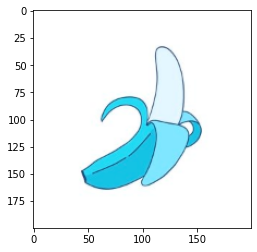

In [ ]:
#check the images from training set
import random
qq = random.randint(0, 239) #picks a random value out of the 240 images in the training set
print(train_labels[qq])
plt.imshow(train_img[qq])
print(qq)

In [ ]:
print(x_train.shape)

(180, 200, 200, 3)


In [ ]:
#Create a CNN model
model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size=(3,3), activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30, kernel_size = (3,3), activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters = 30, kernel_size = (3,3), activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(4,activation= 'softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [ ]:
#training
history = model.fit(x_train,y_train,epochs = 50, batch_size = 50, validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 235ms/step - loss: 5.0499 - accuracy: 0.2500 - val_loss: 1.9385 - val_accuracy: 0.2833
Epoch 2/50
4/4 [==============================] - 0s 85ms/step - loss: 2.2099 - accuracy: 0.3944 - val_loss: 1.7772 - val_accuracy: 0.5667
Epoch 3/50
4/4 [==============================] - 0s 82ms/step - loss: 1.1928 - accuracy: 0.4944 - val_loss: 1.8061 - val_accuracy: 0.4667
Epoch 4/50
4/4 [==============================] - 0s 82ms/step - loss: 1.0149 - accuracy: 0.5667 - val_loss: 1.2496 - val_accuracy: 0.4667
Epoch 5/50
4/4 [==============================] - 0s 83ms/step - loss: 0.8686 - accuracy: 0.6778 - val_loss: 1.4982 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 81ms/step - loss: 0.7965 - accuracy: 0.7278 - val_loss: 1.0644 - val_accuracy: 0.5167
Epoch 7/50
4/4 [==============================] - 0s 83ms/step - loss: 0.5220 - accuracy: 0.7778 - val_loss: 1.2170 - val_accuracy: 0.7000
Epoch 8/50
4/4 [==========

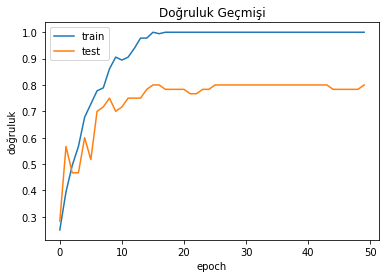

In [ ]:
#View model performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

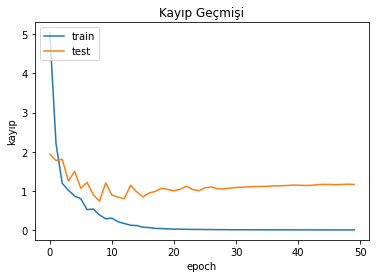

In [ ]:
#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Get validation for predictions
evaluate = model.evaluate(x_val, y_val)
print(evaluate)

2/2 [==============================] - 0s 83ms/step - loss: 1.1645 - accuracy: 0.8000
[1.164521336555481, 0.800000011920929]


Actual :   ['banana']
Predicted :  banana


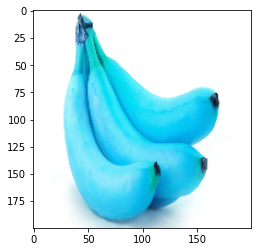

In [ ]:
#Test over specific examples that you may choose for yourself
tt = random.randint(0,59) #random image choice
tImage = test_img[tt:tt+1]
tLabel = test_labels[tt:tt+1]

predict = model.predict(np.array(tImage))

output = {0:'apple', 1:'banana', 2:'mixed', 3:'orange'}

print("Truth :  ", tLabel)
print("Prediction : ", output[np.argmax(predict)])
plt.imshow(test_img[tt])